## pair0042: 
Mean daily temperature of Furtwangen (Schwarzwald), Germany
- time range: 1/1/1979-31/1/2004
- (morning temperature + midday temperature + 2 * evening temperature) / 4

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from diptest import diptest  

In [7]:
# Load dataset
df = pd.read_csv('datasets/pair0042.txt', delimiter='\t', header=None, names=['days of the year', 'mean daily temperature'])    

In [8]:
# Display few rows of the dataset
print(df.head())   

   days of the year  mean daily temperature
0                 1                   -16.3
1                 2                   -13.4
2                 3                   -13.0
3                 4                   -12.8
4                 5                   -13.6


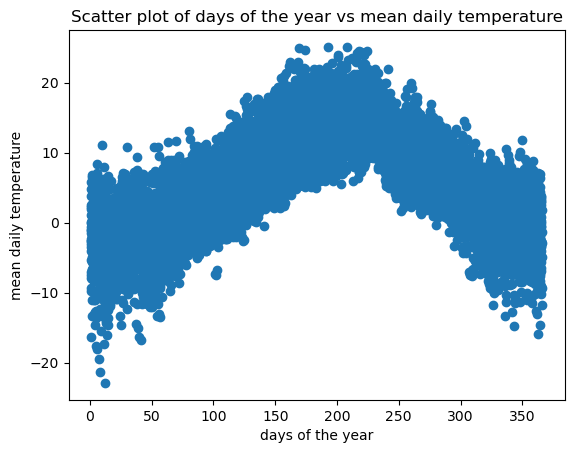

In [9]:
# Scatter Plot
plt.scatter(df['days of the year'], df['mean daily temperature'])
plt.xlabel('days of the year')
plt.ylabel('mean daily temperature')
plt.title('Scatter plot of days of the year vs mean daily temperature')
plt.show()
    

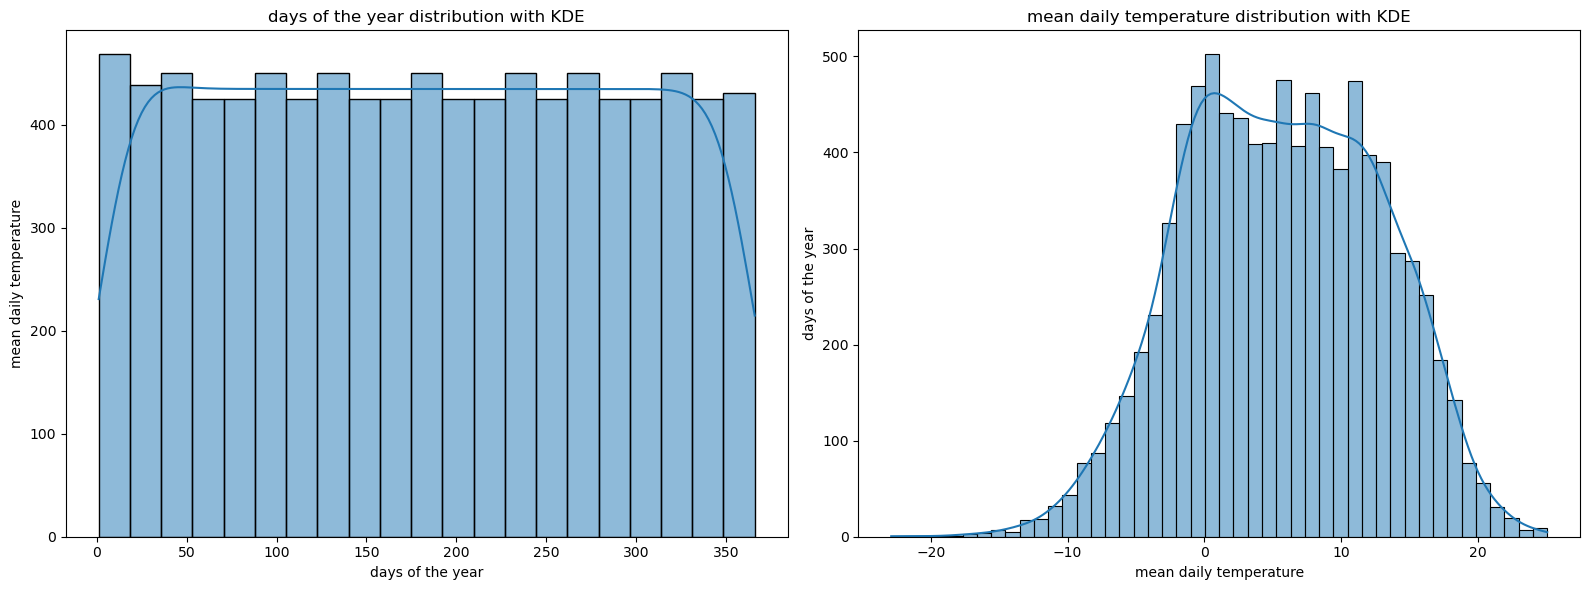

In [10]:
# Plot the distribution of the data in both directions (x and y)
fig, axis = plt.subplots(1, 2, figsize=(16,6))

# Plot for days of the year -> mean daily temperature (X -> Y)
sns.histplot(df['days of the year'], kde=True, ax=axis[0])
axis[0].set_xlabel('days of the year')
axis[0].set_ylabel('mean daily temperature')
axis[0].set_title('days of the year distribution with KDE')

# Plot for mean daily temperature -> days of the year (Y -> X)
sns.histplot(df['mean daily temperature'], kde=True, ax=axis[1])
axis[1].set_xlabel('mean daily temperature')
axis[1].set_ylabel('days of the year')
axis[1].set_title('mean daily temperature distribution with KDE')

# Adjust layout to set the title and labels
plt.tight_layout()
plt.show()  

In [11]:
# Dip-Test for x and y
dip_test, p_val = diptest(np.array(df['days of the year']))
print(f"Dip-Test (X → Y): {dip_test}, p-value: {p_val}")   
dip_test, p_val = diptest(np.array(df['mean daily temperature']))
print(f"Dip-Test (Y → X): {dip_test}, p-value: {p_val}")

Dip-Test (X → Y): 0.0014189041693953286, p-value: 1.0
Dip-Test (Y → X): 0.005978498144509936, p-value: 0.032061847727356096


### Findings:
- The ground truth relationship is X → Y
- The dip test results suggest that the distribution of X → Y is likely **unimodal**, supported by a high p-value 1.0.
- While the distribution of Y → X direction is **multimodal**, supported by a low p-value 0.032.